In [1]:
import numpy as np

In [2]:
tau_red = np.load("../nl-fgpa/tau_red_test_320Mpc.npy")
tau_real = np.load("../nl-fgpa/tau_real_test_320Mpc.npy")

#very quickly created rough sims...


Populating the interactive namespace from numpy and matplotlib


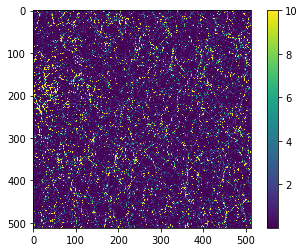

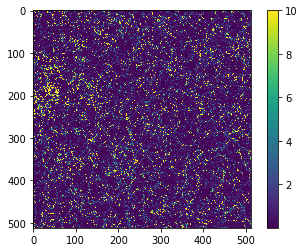

In [3]:
%pylab inline
from nbodykit.source.mesh import BigFileMesh

import nbodykit

imshow(tau_red[0],vmax=10)
colorbar()
show()
imshow(tau_real[0],vmax=10)
colorbar()
show()

In [4]:
flux_raw = np.exp(-tau_red)
flux_red = flux_raw/flux_raw.mean()-1

flux_raw = np.exp(-tau_real)
flux_real = flux_raw/flux_raw.mean()-1

In [5]:
np.save("flux_red",flux_red)

In [6]:
from scipy import ndimage

In [7]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(flux_red, 320)
pm_real = nbodykit.source.mesh.array.ArrayMesh(flux_real, 320)

In [8]:
#choice of dk and kmin are open for exploration... smaller dk will likely be less numerically stable for later optimization

r_red = FFTPower(pm_red, mode='1d', dk=0.10, kmin=0.0001)
r_real = FFTPower(pm_real, mode='1d', dk=0.10, kmin=0.0001)

/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


In [9]:
Pk_red = r_red.power
Pk_real = r_real.power

Text(0,0.5,'$kP(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

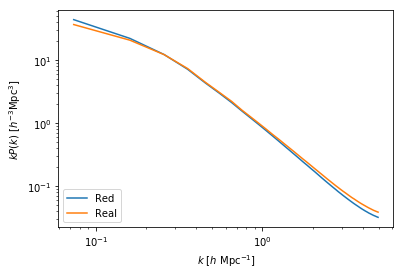

In [10]:
labels = ["Red","Real"]
for i,Pk in enumerate([Pk_red,Pk_real]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$kP(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [12]:
#1d powerspectra is vert similar in redshift and real space, not super-suprising... 

In [17]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=0.1, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_red = r_red_2d.power

r_real_2d = FFTPower(pm_real, mode='2d', dk=0.1, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_real = r_real_2d.power


/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


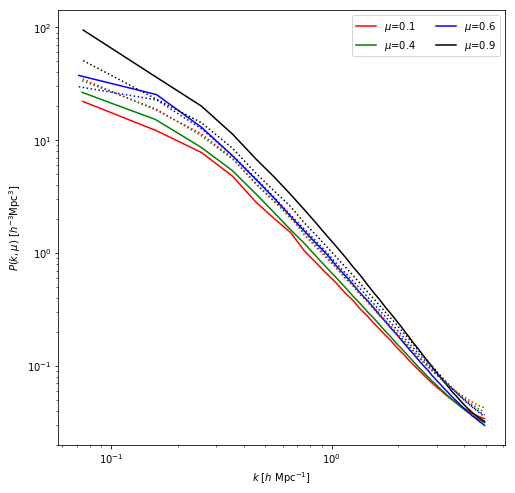

In [19]:
plt.figure(figsize=(8,8))

# plot each mu bin
lines = ["r","g","b","k","y"]
for i in range(Pkmu_red.shape[1]):
    Pk = Pkmu_red[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real,lines[i], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot realspace as little dots on top
for i in range(Pkmu_real.shape[1]):
    Pk = Pkmu_real[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real,lines[i]+":", label=label)

In [ ]:
#redshift space has much greater mu variation compared to real space, as expected

In [22]:
#readout to file, some indexing gymnastics needed...
output_all = []
for i in range(0,4):
    output_all.append([Pkmu_red[:,i]["k"],Pkmu_red[:,i]["mu"],Pkmu_red[:,i]["power"].real])
np.save("pkmu_red_4",np.swapaxes(np.array(output_all),1,2).reshape(-1,3))